In [82]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

In [83]:
bin_df = pd.read_pickle('./bin_df.pkl')

In [84]:
X = bin_df['string_tokens']
y = bin_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, stratify = y)

In [85]:
vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [86]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)

KNeighborsClassifier()

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


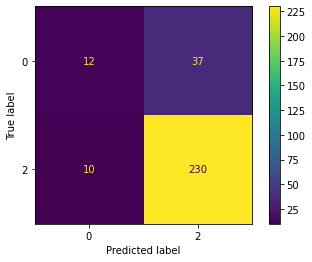

In [87]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [88]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

In [89]:
y_preds = rfc.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


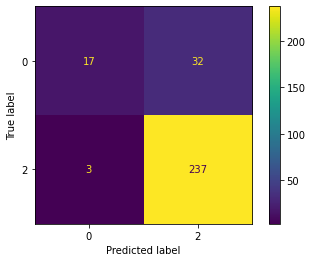

In [90]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

In [91]:
svcl = svm.SVC()
svcl.fit(X_train_vect, y_train)
svcl_score = svcl.score(X_test_vect, y_test)
print("Results for Support Vector Machine with TFIDF-Vectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vect)

Results for Support Vector Machine with TFIDF-Vectorizer
0.8685121107266436


/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


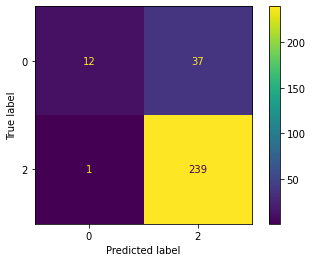

In [92]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [93]:
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.24      0.92      0.39        13
           2       1.00      0.87      0.93       276

    accuracy                           0.87       289
   macro avg       0.62      0.89      0.66       289
weighted avg       0.96      0.87      0.90       289



In [94]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_mnb = cnb.predict(X_test_vect)

In [95]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.35      0.55      0.42        31
           2       0.94      0.88      0.91       258

    accuracy                           0.84       289
   macro avg       0.64      0.71      0.67       289
weighted avg       0.88      0.84      0.86       289



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


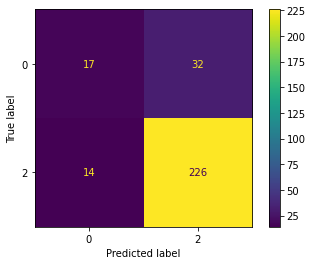

In [96]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

In [97]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect, y_train)

y_preds_gboost = gboost.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


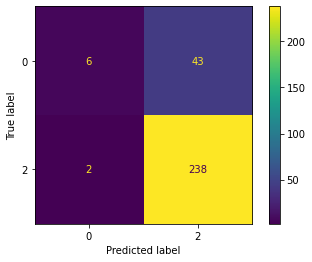

In [98]:
plot_confusion_matrix(gboost, X_test_vect, y_test)